This file helps 
1. converts the ffmepge records to csv
2. do regression based on existing data

In [1]:
import csv

# converts ff_records.txt into csv
fp = open("ff_records.txt", "r")
fp_csv = open("ff_records.csv", "a")
csv_write = csv.writer(fp_csv)
csv_write.writerow(["BER", "IBER", "NIBER", "PSNR", "SSIM"])
index = 0
row = []
for line in fp.readlines():
    index += 1
    if(index % 11 == 1): # bit error rate
        ber = float(line.split(" ")[-1])
        row.append(ber)
    elif(index % 11 == 2):
        Iber = float(line.split(" ")[-1])
        row.append(Iber)
    elif(index % 11 == 3):
        NIber = float(line.split(" ")[-1])
        row.append(NIber)
    elif(index % 11 == 9):
        psnr = float(line.split(" ")[-1])
        row.append(psnr)
    elif(index % 11 == 10):
        ssim = float(line.split(" ")[-1])        
        row.append(ssim)
        csv_write.writerow(row)
    elif (index % 11 == 0):
        row = []
fp.close()
fp_csv.close()
print("Executed!")

Executed!


In [2]:
# combine and average the data row with the same IBER and NIBER
fp_csv = open("ff_records.csv", "r")
fp_ext = open("ff_records_final.csv", "a")
csv_read = csv.reader(fp_csv)
csv_write = csv.writer(fp_ext)
csv_write.writerow(["IBER", "NIBER", "PSNR", "SSIM"])
firstline = 1
size = 0
group = 100
dic = {}
for row in csv_read:
    if firstline:
        firstline = 0
        continue
    size += 1
    if(size % group == 1 and size != 1):
        for it_key, it_value in dic.items():
            iber = float(it_key.split("|")[0])
            niber = float(it_key.split("|")[1])
            length = len(it_value)
            count = 0
            psnr_avg = 0
            ssim_avg = 0
            while count < length:
                if count % 2 == 0:
                    psnr_avg += float(it_value[count])
                else:
                    ssim_avg += float(it_value[count])
                count += 1
            psnr_avg /= (length/2)
            ssim_avg /= (length/2)
            psnr_avg = round(psnr_avg, 6)
            ssim_avg = round(ssim_avg, 6)
            csv_write.writerow([iber, niber, psnr_avg, ssim_avg])
        dic.clear()
    key = str(row[1]) + str("|") + str(row[2])
    value = []
    value.append(row[3])
    value.append(row[4])
    if key in dic:
        dic[key] = dic[key] + value
        # print(dic[key])
    else:
        dic[key] = value
for it_key, it_value in dic.items():
    iber = float(it_key.split("|")[0])
    niber = float(it_key.split("|")[1])
    length = len(it_value)
    count = 0
    psnr_avg = 0
    ssim_avg = 0
    while count < length:
        if count % 2 == 0:
            psnr_avg += float(it_value[count])
        else:
            ssim_avg += float(it_value[count])
        count += 1
    psnr_avg /= (length/2)
    ssim_avg /= (length/2)
    psnr_avg = round(psnr_avg, 6)
    ssim_avg = round(ssim_avg, 6)
    csv_write.writerow([iber, niber, psnr_avg, ssim_avg])    
# print(dic)
fp_csv.close()
fp_ext.close()
print("Executed!")

Executed!


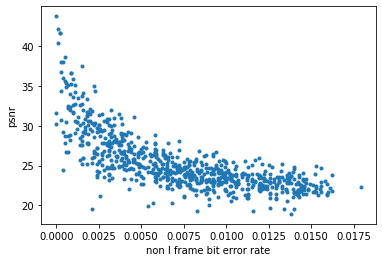

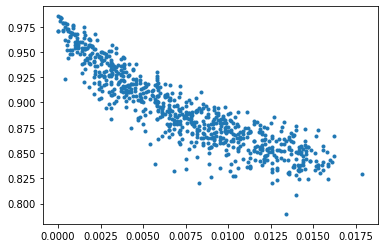

In [3]:
# data preparations
# TODO: uni-variant regression and visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

stat = pd.read_csv("ff_records_final.csv")
stat.columns = ['ibr','nibr','psnr','ssim']
stat_arr = np.array(stat)
ibr = stat_arr[...,0]
nibr = stat_arr[..., 1]
BR = stat_arr[...,0:2]
psnr = stat_arr[..., 2]
ssim = stat_arr[..., 3]
label_title = "test"
plt.scatter(nibr, psnr, label = label_title, marker=".")
plt.xlabel("non I frame bit error rate")
plt.ylabel("psnr")
plt.show()
plt.scatter(nibr, ssim, marker='.')
plt.show()



In [4]:
# multi-variant Linear regression
# TODO a 3-d visualization
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(BR, psnr)
r2_score = model.score(BR, psnr)
print("PSNR--------------------")
print("R2 score is:", r2_score)
print('coefficient of determination:', model.coef_)
print("interception is:", model.intercept_)
print("SSIM--------------------")
model.fit(BR, ssim)
r2_score = model.score(BR, ssim)
print("R2 score is:", r2_score)
print('coefficient of determination:', model.coef_)
print("interception is:", model.intercept_)


PSNR--------------------
R2 score is: 0.5822568876435386
coefficient of determination: [-155.16359663 -470.67061002]
interception is: 30.000787556366305
SSIM--------------------
R2 score is: 0.8444542380707812
coefficient of determination: [-1.50605155 -6.78205709]
interception is: 0.9547558461137334


In [31]:
#TODO multi-variant polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
Input = [('polynomial', PolynomialFeatures(degree=2),('modal', LinearRegression()))]
pipe = Pipeline(Input)


ValueError: too many values to unpack (expected 2)